# Structure from motion

In [179]:
from src.corres_search import *
from src.reconstruction import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load Images

img1 = cv.imread("")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.imread("data/fountain-P11/images/0004.jpg")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [181]:
# Extract and save keypoints

kp1, desc1 = extract_features(img1)
kp2, desc2 = extract_features(img2)

2148


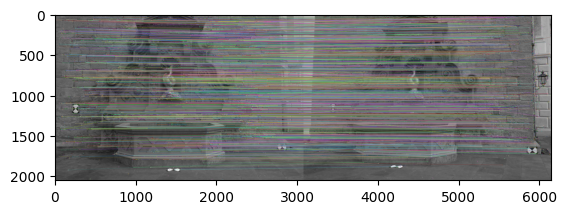

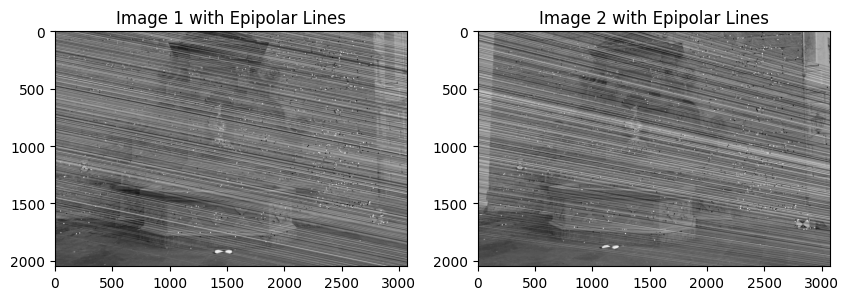

In [182]:
kp_matched, left_pts, right_pts = match_keypoints_flann(kp1=kp1, desc1=desc1, kp2=kp2, desc2=desc2, n_trees=10, n_checks=100, lowe_ratio=0.75)
print(len(kp_matched))

matched_img = draw_matches(img1, img2, kp1, kp2, kp_matched)
cv.imwrite('matched_kp.jpg', cv.cvtColor(matched_img, cv.COLOR_RGB2BGR))
plt.imshow(matched_img)
plt.show()

pts1 = np.float32([kp1[m.queryIdx].pt for m in kp_matched])
pts2 = np.float32([kp2[m.trainIdx].pt for m in kp_matched])

F = calculate_fund_matrix(pts1, pts2)
img1_lines, img2_lines = get_epipolar_line(img1, img2, F, pts1, pts2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_lines, cmap='gray')
plt.title("Image 1 with Epipolar Lines")

plt.subplot(1, 2, 2)
plt.imshow(img2_lines, cmap='gray')
plt.title("Image 2 with Epipolar Lines")

plt.show()